# Important Analysis 

Below is an anlysis of the `brainsize.csv` data. WARNING: Poor methods to follow. 

In [40]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
#read data
brain = pd.read_table("brainsize.csv", sep = ";", index_col=0, na_values = ".")

brain.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


(array([4., 4., 5., 4., 9., 4., 1., 3., 1., 4.]),
 array([62. , 63.5, 65. , 66.5, 68. , 69.5, 71. , 72.5, 74. , 75.5, 77. ]),
 <a list of 10 Patch objects>)

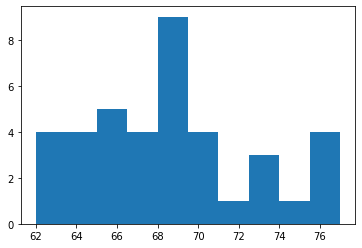

In [30]:
plt.hist(brain['Height'])

In [68]:
random.seed(242)
#crete new variable
partY = np.random.randn(len(brain))

#add new var to data
brain["partY"] = partY


In [98]:
brain.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY
1,Female,133,132,124,118.0,64.5,816932,-0.357519
2,Male,140,150,124,NaN,72.5,1001121,0.148448
3,Male,139,123,150,143.0,73.3,1038437,0.993531
4,Male,133,129,128,172.0,68.8,965353,1.838968
5,Female,137,132,134,147.0,65.0,951545,-0.744026


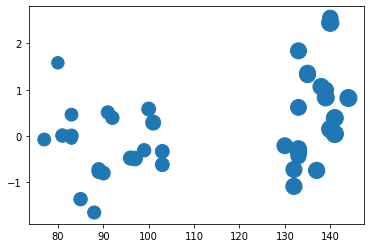

In [99]:
# plot partY var as a function of FSIQ and VIQ
plt.scatter(x = brain["FSIQ"], y = brain["partY"], s = brain["VIQ"]*2)

In [100]:
#Make a categorical variable of high and low FSIQ
brain["FSIQ_lvl"] = np.where(brain["FSIQ"] > 110, "High", "Low")

In [113]:
from statsmodels.formula.api import ols
model1 = ols("partY ~ FSIQ_lvl", brain).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  partY   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     6.412
Date:                Tue, 19 May 2020   Prob (F-statistic):             0.0156
Time:                        18:09:57   Log-Likelihood:                -51.562
No. Observations:                  40   AIC:                             107.1
Df Residuals:                      38   BIC:                             110.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5290      0.201     

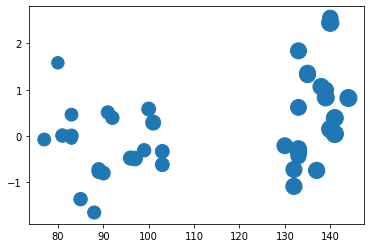